In [102]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import optimize as opt
from scipy import constants
from math import *

plt.rcParams.update({'font.size': 12})

#numThreadsUsed
xValues=[1, 2, 4, 8, 16]
no_omp_sample = [0.5421347096326495, 0.5304054950009283, 0.5429412211833946, 0.543776747018744, 0.53950236302035]
mmups_singleThread = sum(no_omp_sample) / len(no_omp_sample) #TODO: get value

#yValues, no padding
mmups = {"threeDim": [0.4197077994300368, 0.6017028189777069, 1.1911852293031566, 2.4409890887787733, 2.2843567251461985],
        "twoDim": [0.6574665185175445, 1.2397104036497073, 2.2606022244325885, 3.5004200504060488, 2.737101409607226], #no, this is no measuring error, probably too small sample
        "oneDim": [0.4149928621227715, 0.7651050871837246, 1.4404033129276197, 2.326717699341539, 2.117432824443645], #made up values to test functionality of graphs, replacing them atm
        "twoDim-roundRobin": [0.6698910757110893, 1.2675717128696555, 2.325527313318295, 3.696584356055005, 3.0280090840272518],  #TODO: last value!!
        "threeDim-roundRobin": [0.4194366965165783, 0.6966747713165062, 1.472277023644769, 2.4598430620126437, 2.3225027289407065],    #dummy value 
        "twoDimColor": [0.5487901920216882, 1.0342117238241013, 1.9380220546909825, 3.3561551886159218, 2.7642636001769127]
}

mmupsPadding = {"twoDim": [0.6290495061961376, 1.1793982710021347, 2.045031595738154, 3.029476809355024, 2.376538808878749],
                "twoDim-roundRobin": [0.6232626553482169, 1.0648833420298807, 1.452411729677129, 1.491958344523021, 1.2987350320787552]}

speedUpsNoOmpComp = {}
speedUpsSingleTComp = {}

#initialize speedup data
for k in mmups.keys():
    noOmpEntry = []
    singleTEntry = []
    for i in range(0, len(mmups[k])):
        noOmpEntry.append(mmups[k][i]/mmups[k][0])
        singleTEntry.append(mmups[k][i]/mmups_singleThread)
    speedUpsNoOmpComp[k] = noOmpEntry
    speedUpsSingleTComp[k] = singleTEntry


In [103]:
def createGraph(xValues, firstSample, firstLabel : str, secondSample, secondLabel : str, x_label : str, y_label : str, filename : str, title:str,
thirdSample = None, thirdLabel:str = None, fourthSample = None, fourthLabel : str = None):
    fig, ax = plt.subplots()

    ax.errorbar(
        xValues,
        firstSample,
        #yerr = ,
        marker = '.',
        color ='green',
        markerfacecolor = 'green',
        linestyle = '',
        elinewidth= 0.5,
        capsize = 1.5,
        label=firstLabel
    )

    ax.errorbar(
        xValues,
        secondSample,
        #yerr = ,
        marker = '.',
        color ='red',
        markerfacecolor = 'red',
        linestyle = '',
        elinewidth= 0.5,
        capsize = 1.5,
        label=secondLabel
    )

    for (s,l, color) in ((thirdSample, thirdLabel, 'orange'), (fourthSample, fourthLabel, 'cyan')):
        if(s != None):
            ax.errorbar(
            xValues,
            s,
            #yerr = ,
            marker = '.',
            color =color,
            markerfacecolor = color,
            linestyle = '',
            elinewidth= 0.5,
            capsize = 1.5,
            label=l
            )

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    ax.legend()
    fig.savefig(filename + '.pdf')
    fig.savefig(filename+'.png')

def createBarGraph(xValues, sample : list, x_label:str, y_label:str, title:str, filename:str):
    fig, ax = plt.subplots()

    ax.bar(np.arange(len(xValues)), sample, align='center')
    ax.set_xticks(range(len(xValues)),xValues)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    # Striche auf x-Achse ausschalten
    ax.tick_params(
        axis='x',
        which='both', #major und minor ticks
        bottom=False  # ticks auf der x-Achse (unten)
    )

    ax.legend()
    fig.savefig(filename+'.pdf')
    fig.savefig(filename+'.png')


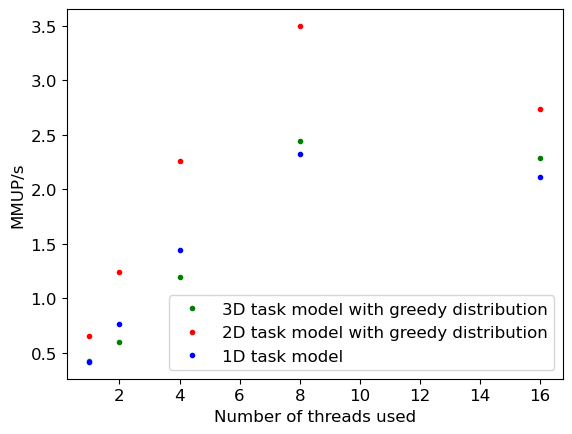

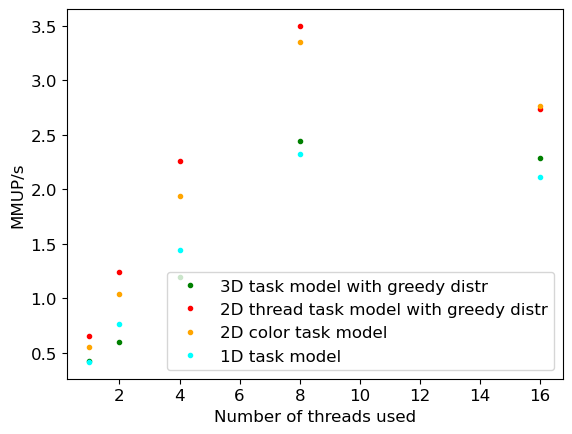

In [104]:
#def createGraph(xValues, firstSample, firstLabel : str, secondSample, secondLabel : str, x_label : str, y_label : str, filename : str, title:str,
#thirdSample = None, thirdLabel:str = None, fourthSample = None, fourthLabel : str = None):

createGraph(xValues=xValues, x_label="Number of threads used", y_label="MMUP/s", filename="taskDimComp", title="",
            firstSample=mmups["threeDim"], firstLabel="3D task model with greedy distr", 
            secondSample=mmups["twoDim"], secondLabel="2D thread task model with greedy distr",
            thirdSample=mmups["twoDimColor"], thirdLabel="2D color task model",
            fourthSample=mmups["oneDim"], fourthLabel="1D task model",)

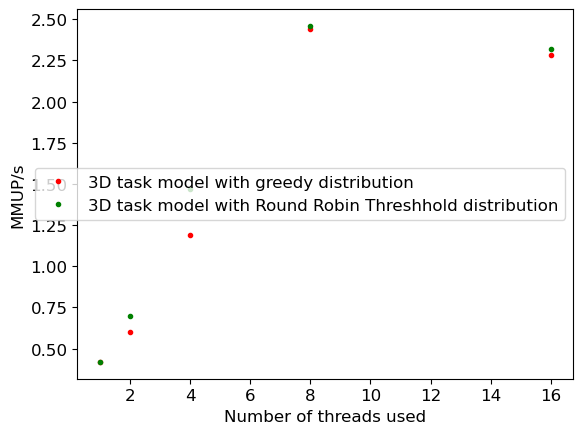

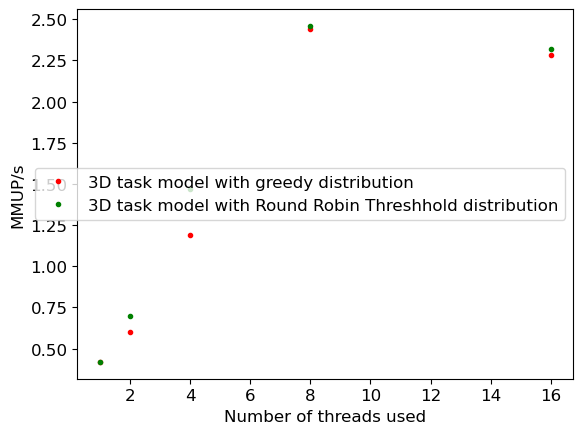

In [105]:
#Compare roundRobin with Greedy:
#three dimensional tasks

fig3d, ax3d = plt.subplots()

ax3d.errorbar(
    xValues,
    mmups["threeDim"],
    #yerr = ,
    marker = '.',
    color ='red',
    markerfacecolor = 'red',
    linestyle = '',
    elinewidth= 0.5,
    capsize = 1.5,
    label="3D task model with greedy distribution"
)

ax3d.errorbar(
    xValues,
    mmups["threeDim-roundRobin"],
    #yerr = ,
    marker = '.',
    color ='green',
    markerfacecolor = 'green',
    linestyle = '',
    elinewidth= 0.5,
    capsize = 1.5,
    label="3D task model with Round Robin Threshhold distribution"
)

ax3d.set_xlabel("Number of threads used")
ax3d.set_ylabel("MMUP/s")

ax3d.legend()
fig3d.savefig('threeDimDistroComp.pdf')
fig3d.savefig('threeDimDistroComp.png')
fig3d

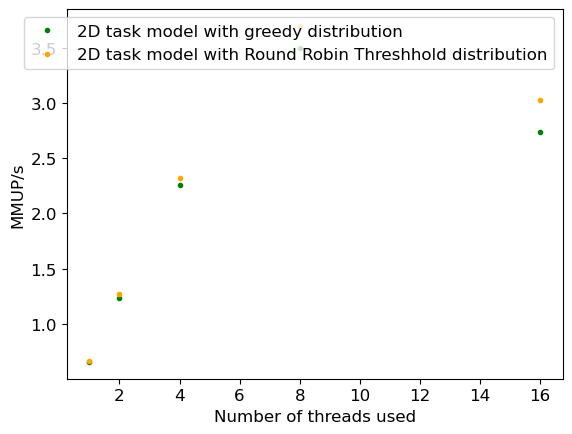

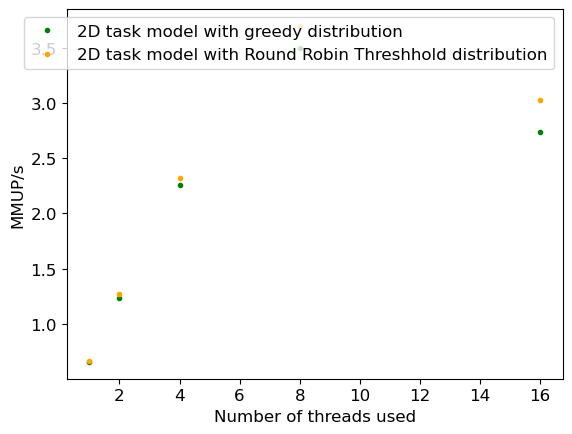

In [106]:
#Compare roundRobin with Greedy:
#two dimensional tasks

fig2d, ax2d = plt.subplots()

ax2d.errorbar(
    xValues,
    mmups["twoDim"],
    #yerr = ,
    marker = '.',
    color ='green',
    markerfacecolor = 'green',
    linestyle = '',
    elinewidth= 0.5,
    capsize = 1.5,
    label="2D task model with greedy distribution"
)

ax2d.errorbar(
    xValues,
    mmups["twoDim-roundRobin"],
    #yerr = ,
    marker = '.',
    color ='orange',
    markerfacecolor = 'orange',
    linestyle = '',
    elinewidth= 0.5,
    capsize = 1.5,
    label="2D task model with Round Robin Threshhold distribution"
)

ax2d.set_xlabel("Number of threads used")
ax2d.set_ylabel("MMUP/s")

ax2d.legend()
fig2d.savefig('twoDimDistroComp.pdf')
fig2d.savefig('twoDimDistroComp.png')
fig2d

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


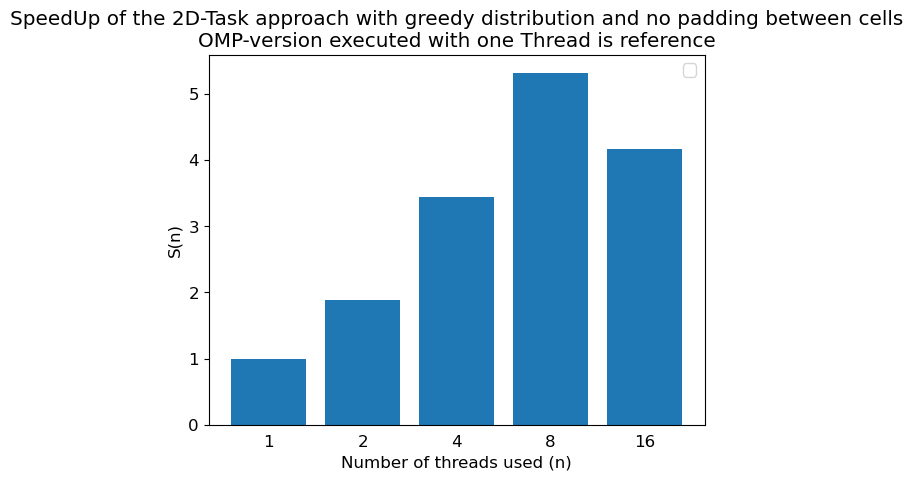

In [107]:
#speedup 2D, Greedy, omp as comparison
figTester, axTester = plt.subplots()

axTester.bar(np.arange(len(xValues)), speedUpsNoOmpComp['twoDim'], align='center')
axTester.set_xticks([0,1,2,3,4],xValues)
axTester.set_ylabel('S(n)')
axTester.set_xlabel('Number of threads used (n)')
axTester.set_title('SpeedUp of the 2D-Task approach with greedy distribution and no padding between cells\nOMP-version executed with one Thread is reference')
# Striche auf x-Achse ausschalten
axTester.tick_params(
    axis='x',
    which='both', #major und minor ticks
    bottom=False  # ticks auf der x-Achse (unten)
)

axTester.legend()
figTester.savefig('speedup_2D_omp_comp.pdf')
figTester.savefig('speedup_2D_omp_comp.png')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


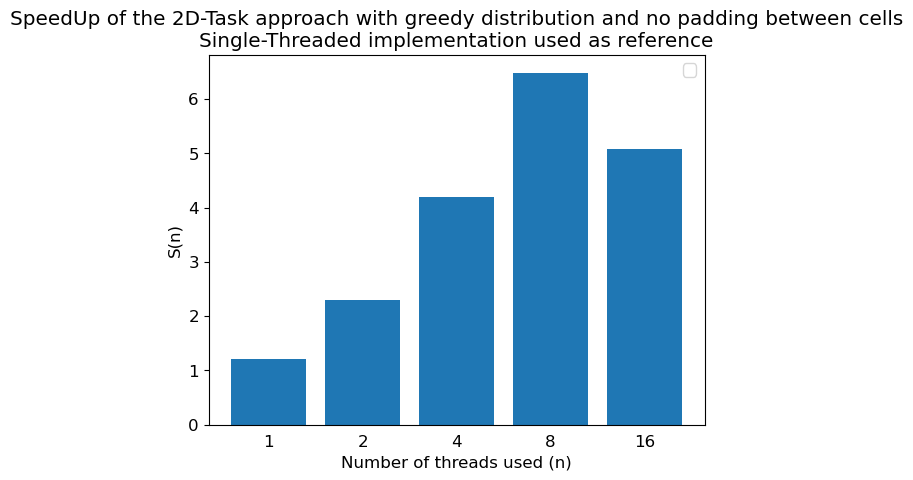

In [108]:
#speedup 2D, Greedy, single threaded as comparison
figTester, axTester = plt.subplots()


axTester.bar(np.arange(len(xValues)), speedUpsSingleTComp['twoDim'], align='center')
axTester.set_xticks([0,1,2,3,4],xValues)
axTester.set_ylabel('S(n)')
axTester.set_xlabel('Number of threads used (n)')
axTester.set_title('SpeedUp of the 2D-Task approach with greedy distribution and no padding between cells\nSingle-Threaded implementation used as reference')
# Striche auf x-Achse ausschalten
axTester.tick_params(
    axis='x',
    which='both', #major und minor ticks
    bottom=False  # ticks auf der x-Achse (unten)
)

axTester.legend()
figTester.savefig('speedup_2D_st_comp.pdf')
figTester.savefig('speedup_2D_st_comp.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


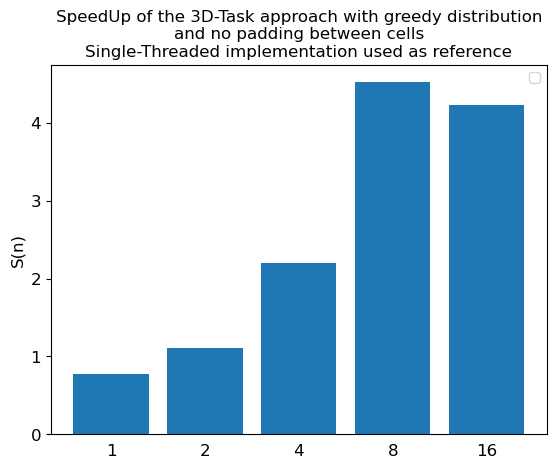

In [109]:
#speedup 3D, Greedy, single threaded as comparison
fig3dSp, ax3dSp = plt.subplots()

plt.rcParams.update({'font.size': 10})

ax3dSp.bar(np.arange(len(xValues)), speedUpsSingleTComp['threeDim'], align='center')
ax3dSp.set_xticks([0,1,2,3,4],xValues)
ax3dSp.set_ylabel('S(n)')
ax3dSp.set_title('SpeedUp of the 3D-Task approach with greedy distribution\nand no padding between cells\nSingle-Threaded implementation used as reference')
# Striche auf x-Achse ausschalten
ax3dSp.tick_params(
    axis='x',
    which='both', #major und minor ticks
    bottom=False  # ticks auf der x-Achse (unten)
)

ax3dSp.legend()
fig3dSp.savefig('speedup_3D_st_comp.pdf')
fig3dSp.savefig('speedup_3D_st_comp.png')

plt.rcParams.update({'font.size': 12})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


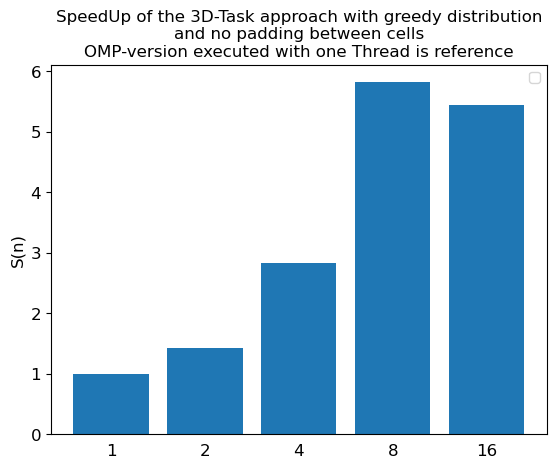

In [110]:
#speedup 3D, Greedy, omp as comparison
fig3dSp, ax3dSp = plt.subplots()

plt.rcParams.update({'font.size': 10})

ax3dSp.bar(np.arange(len(xValues)), speedUpsNoOmpComp['threeDim'], align='center')
ax3dSp.set_xticks([0,1,2,3,4],xValues)
ax3dSp.set_ylabel('S(n)')
ax3dSp.set_title('SpeedUp of the 3D-Task approach with greedy distribution\nand no padding between cells\nOMP-version executed with one Thread is reference')
# Striche auf x-Achse ausschalten
ax3dSp.tick_params(
    axis='x',
    which='both', #major und minor ticks
    bottom=False  # ticks auf der x-Achse (unten)
)

ax3dSp.legend()
fig3dSp.savefig('speedup_3D_omp_comp.pdf')
fig3dSp.savefig('speedup_3D_omp_comp.png')

plt.rcParams.update({'font.size': 12})


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


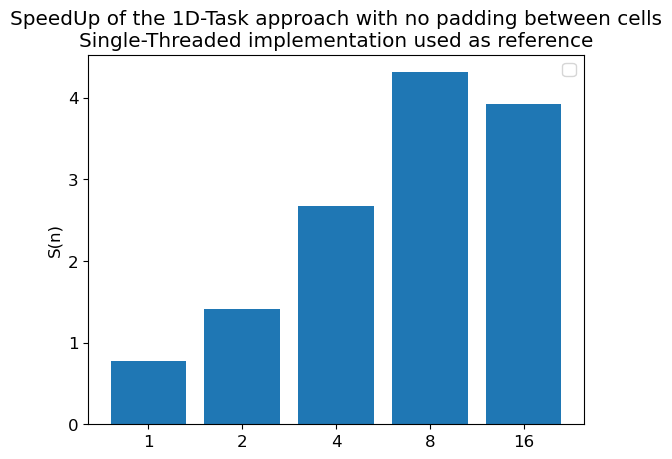

In [111]:
#speedup 1D, Single Threaded as comparison
fig1dSp, ax1dSp = plt.subplots()

ax1dSp.bar(np.arange(len(xValues)), speedUpsSingleTComp['oneDim'], align='center')
ax1dSp.set_xticks([0,1,2,3,4],xValues)
ax1dSp.set_ylabel('S(n)')
ax1dSp.set_title('SpeedUp of the 1D-Task approach with no padding between cells\nSingle-Threaded implementation used as reference')
# Striche auf x-Achse ausschalten
ax3dSp.tick_params(
    axis='x',
    which='both', #major und minor ticks
    bottom=False  # ticks auf der x-Achse (unten)
)

ax1dSp.legend()
fig1dSp.savefig('speedup_1D_st_comp.pdf')
fig1dSp.savefig('speedup_1D_st_comp.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


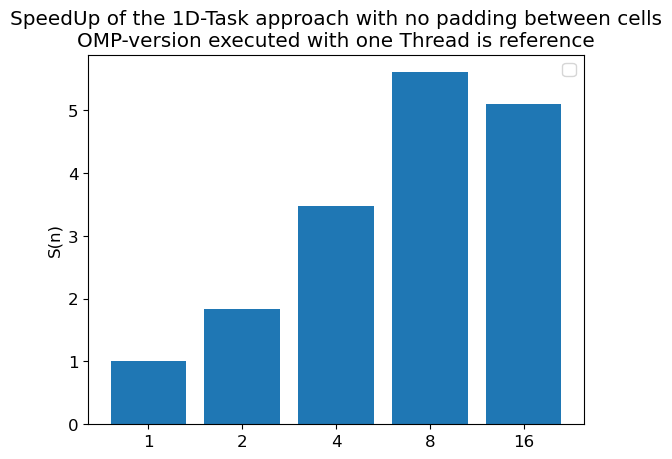

In [112]:
#speedup 1D, Omp as comparison
fig1dSp, ax1dSp = plt.subplots()

ax1dSp.bar(np.arange(len(xValues)), speedUpsNoOmpComp['oneDim'], align='center')
ax1dSp.set_xticks([0,1,2,3,4],xValues)
ax1dSp.set_ylabel('S(n)')
ax1dSp.set_title('SpeedUp of the 1D-Task approach with no padding between cells\nOMP-version executed with one Thread is reference')
# Striche auf x-Achse ausschalten
ax3dSp.tick_params(
    axis='x',
    which='both', #major und minor ticks
    bottom=False  # ticks auf der x-Achse (unten)
)

ax1dSp.legend()
fig1dSp.savefig('speedup_1D_omp_comp.pdf')
fig1dSp.savefig('speedup_1D_omp_comp.png')

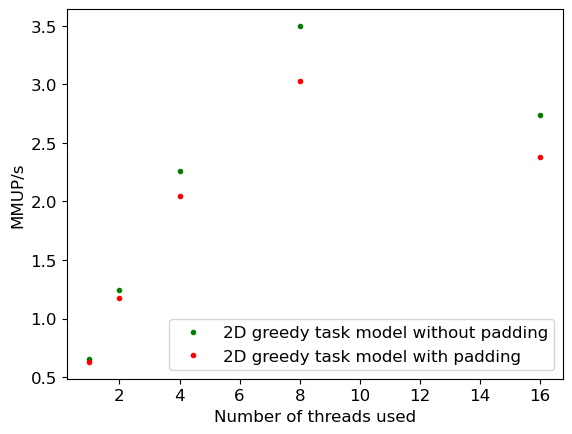

In [113]:
#The cost of padding, 2D approach

#Compare roundRobin with Greedy:
#two dimensional tasks

fig2d, ax2d = plt.subplots()

ax2d.errorbar(
    xValues,
    mmups["twoDim"],
    #yerr = ,
    marker = '.',
    color ='green',
    markerfacecolor = 'green',
    linestyle = '',
    elinewidth= 0.5,
    capsize = 1.5,
    label="2D greedy task model without padding"
)

ax2d.errorbar(
    xValues,
    mmupsPadding["twoDim"],
    #yerr = ,
    marker = '.',
    color ='Red',
    markerfacecolor = 'Red',
    linestyle = '',
    elinewidth= 0.5,
    capsize = 1.5,
    label="2D greedy task model with padding"
)

ax2d.set_xlabel("Number of threads used")
ax2d.set_ylabel("MMUP/s")

ax2d.legend()
fig2d.savefig('2DPaddingComp.pdf')
fig2d.savefig('2DPaddingComp.png')